In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
print(tf.__version__)
print(keras.__version__)

2.2.0-rc4
2.3.0-tf


In [9]:
NLPdata = pd.read_csv('nlpdata.csv')
NLPdata = NLPdata.to_numpy()

In [10]:
model = Sequential()
model.add(Dense(20, activation='selu', input_dim=1)) 
model.add(Dense(28, activation='selu')) 
#model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adagrad')

In [11]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(NLPdata[:,0], NLPdata[:,2], train_size=0.75,test_size=0.25, random_state=101)
#print ("X_train: ", X_train)
#print ("y_train: ", y_train)
#print ("X_test: ", X_test)
#print ("y_test: ", y_test)

In [12]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

#print ("X_train: ", X_train)
#print ("y_train: ", y_train)
#print ("X_test: ", X_test)
#print ("y_test: ", y_test)

In [13]:
model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
28/28 [==============================] - 0s 8ms/step - loss: 0.7830 - val_loss: 0.6623
Epoch 2/50
28/28 [==============================] - 0s 6ms/step - loss: 0.6430 - val_loss: 0.5772
Epoch 3/50
28/28 [==============================] - 0s 5ms/step - loss: 0.5703 - val_loss: 0.5214
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5192 - val_loss: 0.4793
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4796 - val_loss: 0.4460
Epoch 6/50
28/28 [==============================] - 0s 4ms/step - loss: 0.4475 - val_loss: 0.4180
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4202 - val_loss: 0.3942
Epoch 8/50
28/28 [==============================] - 0s 3ms/step - loss: 0.3968 - val_loss: 0.3733
Epoch 9/50
28/28 [==============================] - 0s 3ms/step - loss: 0.3761 - val_loss: 0.3546
Epoch 10/50
28/28 [==============================] - 0s 3ms/step - loss: 0.3576 - val_loss: 0.3381
Epoch 11/50
28/28 [

In [14]:
model.evaluate(X_test, y_test) #, batch_size=30

3/3 [==============================] - 0s 5ms/step - loss: 0.0977


0.09770457446575165

In [15]:
# not entirely sure what these numbers are, tbh
model.predict(X_test, batch_size=30)
model.predict_classes(X_test, batch_size=30)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([27, 27, 27, 20, 27, 27, 27, 20, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 20, 11, 20, 27, 27, 27, 27, 27, 11, 27, 20, 20, 27, 27, 27,
       11, 20, 20, 11, 20, 20, 11, 20, 27, 27, 27, 27, 27, 27, 27, 20, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 11, 27, 27, 27, 20,
       27, 27, 20, 27, 27, 27, 27, 20, 11, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 11, 20, 27, 11, 27])

In [16]:
# not entirely sure what these numbers are, tbh
model.predict(y_test, batch_size=30)
model.predict_classes(y_test, batch_size=30)

array([ 5,  5,  5,  5,  5,  5,  5,  5,  5, 26,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 26,  5,  5,
       26,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 26,  5,  5,
        5,  5,  5,  5,  5,  5, 26,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5])

In [17]:
#Predict values test objects
X_new = X_test
y_proba = model.predict(X_new) # do I need the .round(2)?
print(y_proba)

[[ 0.05615771  0.06117874  0.09570783 ...  0.2263774   0.10908417
   0.68403465]
 [ 0.05615771  0.06117874  0.09570783 ...  0.2263774   0.10908417
   0.68403465]
 [ 0.13545     0.12944847  0.11799757 ...  0.40465415  0.11699728
   1.1003484 ]
 ...
 [ 0.13545     0.12944847  0.11799757 ...  0.40465415  0.11699728
   1.1003484 ]
 [-0.02869751 -0.00811679  0.05049513 ... -0.08404156  0.09504097
   0.06670488]
 [ 0.13545     0.12944847  0.11799757 ...  0.40465415  0.11699728
   1.1003484 ]]


In [18]:
# now let's try a prediction based on Q40

X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(NLPdata[:,1], NLPdata[:,2], train_size=0.75,test_size=0.25, random_state=101)
#print ("X_train: ", X_train)
#print ("y_train: ", y_train)
#print ("X_test: ", X_test)
#print ("y_test: ", y_test)

In [19]:
model.fit(X_train2, y_train2, batch_size=10, epochs=50, verbose=1, validation_data=(X_test2, y_test))

Epoch 1/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0835 - val_loss: 0.1015
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0828 - val_loss: 0.1008
Epoch 3/50
28/28 [==============================] - 0s 4ms/step - loss: 0.0822 - val_loss: 0.1001
Epoch 4/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0815 - val_loss: 0.0994
Epoch 5/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0809 - val_loss: 0.0987
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0804 - val_loss: 0.0980
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0798 - val_loss: 0.0974
Epoch 8/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0793 - val_loss: 0.0968
Epoch 9/50
28/28 [==============================] - 0s 5ms/step - loss: 0.0788 - val_loss: 0.0962
Epoch 10/50
28/28 [==============================] - 0s 4ms/step - loss: 0.0783 - val_loss: 0.0957
Epoch 11/50
28/28 [

In [20]:
model.evaluate(X_test2, y_test2, batch_size=10)

10/10 [==============================] - 0s 3ms/step - loss: 0.0789


0.07891674339771271

In [21]:
model.predict(X_test2, batch_size=10)
model.predict_classes(X_test2, batch_size=10)

array([ 7, 22,  7, 27,  7, 22,  7, 22, 27,  7, 20, 22, 22,  7,  7, 22, 22,
       20, 20, 22, 27, 27, 20,  7, 27, 27, 20, 27, 22,  7, 22, 27,  7,  7,
        7, 20,  7,  7, 22, 27, 22,  7, 22, 22,  7, 27, 22,  7, 27,  7,  7,
       20, 20, 22, 22, 20, 27, 27, 27, 22,  7, 22, 27, 27,  7, 22, 22,  7,
       20, 22, 27, 22, 22, 27, 22,  7, 20, 22, 22, 27,  7, 27, 22, 22, 22,
        7,  7, 20,  7, 22, 27, 27])

In [22]:
model.predict(y_test2, batch_size=10)
model.predict_classes(y_test2, batch_size=10)

array([22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,  5, 22, 22,
       22, 22, 22, 22, 22, 22,  5, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,  5, 22, 22,  5, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22,  5, 22,  5, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22])

In [23]:
#Predict values test objects
X_new = X_test2
y_proba = model.predict(X_new) # do I need the .round(2)?
print(y_proba)

[[ 0.01476526  0.01657947  0.05122546 ... -0.02612395  0.06561409
   0.04324614]
 [ 0.03908056  0.05909468 -0.00411105 ... -0.14908013  0.0484787
  -0.15349141]
 [ 0.01476526  0.01657947  0.05122546 ... -0.02612395  0.06561409
   0.04324614]
 ...
 [ 0.03908056  0.05909468 -0.00411105 ... -0.14908013  0.0484787
  -0.15349141]
 [ 0.29161394  0.24686101  0.15360762 ...  0.6942448   0.12789868
   1.7589501 ]
 [ 0.20094064  0.17869616  0.13433036 ...  0.5060606   0.12056824
   1.318679  ]]


No handles with labels found to put in legend.


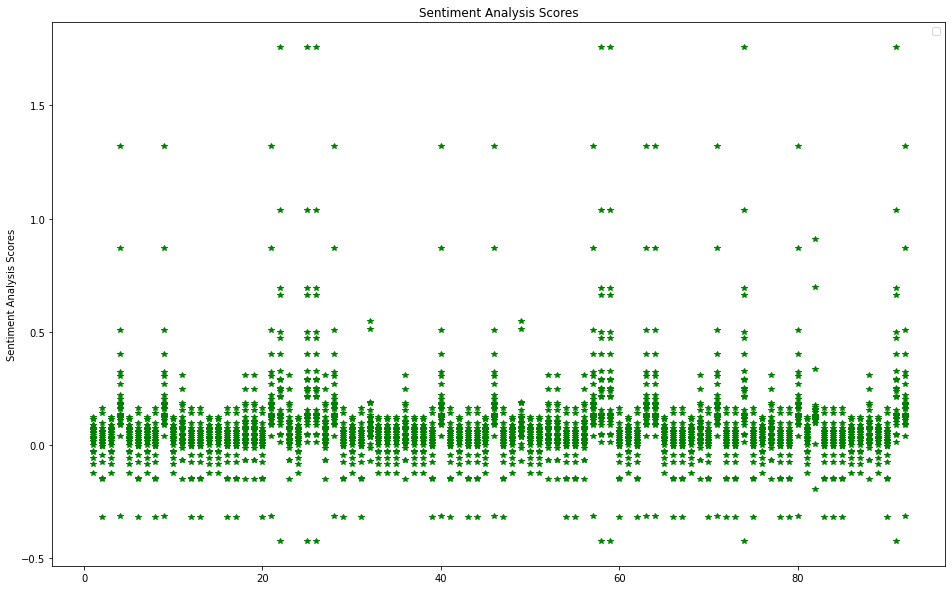

In [27]:
x = np.linspace(1,92,92)
y1 = y_test2
y2 = y_proba
plt.figure(figsize=(16,10))
#plt.plot(x,y1, 'x')
plt.ylabel('Sentiment Analysis Scores')
plt.plot(x,y2, '*', c='g')
#plt.title("Sentiment Analysis Scores")
plt.legend()

No handles with labels found to put in legend.


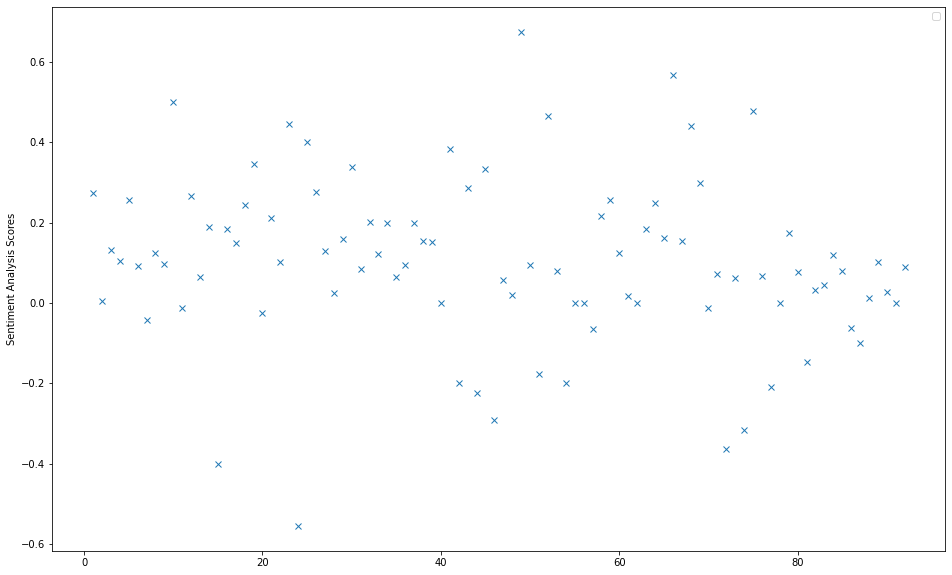

In [28]:
x = np.linspace(1,92,92)
y1 = y_test2
y2 = y_proba
plt.figure(figsize=(16,10))
plt.ylabel('Sentiment Analysis Scores')
plt.plot(x, y1, 'x')
plt.legend()